# First looking

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('train.csv', delimiter='\t')

In [14]:
df.head(5)

,CLIENT_ID,RETRO_DT,tokens,DEF,urls_hashed
0,5909886,20200911,форм 1 мачеха 1 работы 1 пасынка 1 горячую 1 м...,0,7bbcc146c0ba4df814701ff7297b2205 1 ee0d49cbc99...
1,1385448,20210519,platiza 1 мобильные 2 sergej 1 code 3 отказов ...,1,1889e0cbd3e343e9521a07aa312257ac 2 8253d8d3a67...
2,1866195,20210913,sims 3 кредит 1 языке 1 разлива 1 огромное 1 о...,0,6e617b4bfdbef85d8b09ec08ac72f0f2 1 94309f5f116...
3,1587081,20210702,code 1 историй 1 scf 1 шаг 1 деньги 3 серый 1 ...,0,1e833434273e04ba76cfcfb4b48ad21b 3 aee71c8d18d...
4,1400908,20210522,отказов 2 tovara 1 сергея 1 купальный 1 чёрный...,0,83e85bee0d81c0e9e5047e202cddf534 3 6e617b4bfdb...


In [15]:
df['tokens'][2]

'sims 3 кредит 1 языке 1 разлива 1 огромное 1 окна 1 prostaya 1 otdyh 2 масштаб 1 yandex 1 смс 1 igra 2 zagruzka 1 моему 1 ustanovka 1 заявление 1 июля 1 приходится 1 rostov 1 губернатор 1 отдых 2 nazvana 1 центр 1 вопрос 1 money 1 завтра 9 smart 2 море 1 poluchila 1 контактов 1 забирают 1 торрент 3 парацетамол 1 raka 2 slovami 2 полу 1 обычная 1 кредита 1 компьютера 1 названы 1 заявления 1 вузах 1 загрузки 1 predlozhil 1 почта 1 podala 1 voennoj 1 shkolniki 1 поставить 1 чувствуешь 1 качестве 1 krasnodarskogo 2 okna 1 ростов 1 privet 1 nazvali 1 передач 1 нефти 1 repack 1 игры 2 оригинальная 2 сделал 1 fucking 2 toyota 1 kurorte 2 бесплатно 1 samara 1 самаре 1 смотреть 9 фильмы 1 video 4 самара 1 ибупрофен 1 obshchestvo 1 тойота 1 travels 2 добро 1 rossiyanin 2 компьютер 1 районы 1 uchitsya 1 lishatsya 1 gorod 1 сериалы 1 которым 1 банкротство 1 health 2 зараженные 1 россиянин 2 смотрим 1 недорого 1 прямой 8 краснодарского 3 летняя 1 играть 1 business 1 кристина 2 ненси 1 завтрак 1 во

# First cleanup

In [16]:
def clear_from_df(df):
    df = df.dropna() # delete None cells
    return df

In [17]:
# Analysyst

# Embendings

## URLS

In [18]:
from gensim.models import Word2Vec

In [19]:
model = Word2Vec.load('word2vec.model')

In [20]:
dicts = {}
from scipy.special import softmax
import numpy as np
def convert_url_bow_to_embending(get):
    if str(get) == "nan":
        return np.array([np.float32(0)] * 300), np.array([np.float32(0)] * 300), np.array([np.float32(0)] * 300)
    get = str(get).split()
    answer = None
    for i in range(0, len(get), 2):
        word = get[i]
        count = int(get[i + 1])
        if(word in dicts):
            arr = dicts[word]
        else:
            try:
                arr = np.array(model.wv[word])
            except:
                arr = np.array([np.float32(0)] * 300)
            dicts[word] = arr
        if(answer is None):
            answer = arr * count
        else:
            answer = answer + arr * count
    return 2 * answer / (len(get)), answer, softmax(answer)

In [21]:
def get_embending_urls(df):
    df[['urls_embending_avg', 'urls_embending_sum', 'urls_embending_softmax']] = df['urls_hashed'].apply(lambda x: convert_url_bow_to_embending(x)).apply(pd.Series)
    return df

## tokens

In [22]:
from navec import Navec
path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [23]:
dicts = {}
from scipy.special import softmax
def convert_bow_to_embending(get, classif = navec):
    if str(get) == "nan":
        return np.array([np.float32(0)] * 300), np.array([np.float32(0)] * 300), np.array([np.float32(0)] * 300)
    get = str(get).split()
    answer = None
    for i in range(0, len(get), 2):
        word = get[i]
        count = int(get[i + 1])
        if(word in dicts):
            arr = dicts[word]
        else:
            arr = classif.get(word, classif['<pad>'])
            dicts[word] = arr
        if(answer is None):
            answer = arr * count
        else:
            answer = answer + arr * count
    return 2 * answer / (len(get)), answer, softmax(answer)

In [24]:
def get_embending(df):
    df[['tokens_embending_avg', 'tokens_embending_sum', 'tokens_embending_softmax']] = df['tokens'].apply(lambda x: convert_bow_to_embending(x)).apply(pd.Series)
    return df

# One hot encoding

In [25]:
f = open('most_expansive_words.txt', 'r')
lines = f.readlines()
f.close()
print(lines)

['реутове 0.01819427527405603 13136\n', 'охранником 0.03394823595426808 14257\n', 'электростали 0.06708634783425726 10643\n', 'ярость 0.0767750625360785 10394\n', 'guessme 0.09262325239146431 21744\n', 'lift 0.0976651348465859 43086\n', 'contest 0.10565379825653798 20075\n', 'guess 0.10650096548992424 20197\n', 'арбитр 0.10690324858757062 11328\n', 'очередь 0.10866857641051189 48174\n', 'fcutennis 0.10911212681124186 10283\n', 'живая 0.10947895261540966 49151\n', 'арбитражных 0.1095094423957984 17898\n', 'astro 0.11353666718274243 19377\n', 'картотека 0.11445909186022181 19116\n', 'забайкальского 0.11480804387568556 10940\n', 'path 0.11626767464650707 14286\n', 'фигурное 0.11648675171736997 10190\n', 'катание 0.12011385199240987 10540\n', 'tree 0.12143002510006105 14741\n', 'консультации 0.12229849987287059 11799\n', 'маркетинге 0.12388369435959615 42887\n', 'efiry 0.12664083010376298 15998\n', 'обложки 0.127060967622519 35117\n', 'adfox 0.12742162733356815 11356\n', 'auction 0.1281044

In [26]:
def parse_to_dict(x):
    x = str(x).split()
    dicts = {}
    for i in range(0, len(x), 2):
        word = x[i]
        cnt = int(x[i+1])
        dicts[word] = cnt
    return dicts


def parse(x, words):
    if str(x) == "nan":
        return [np.float32(0)] * len(words)

    dicts = parse_to_dict(x)
    answer = []
    for word in words:
        if(word in dicts):
            answer.append(dicts[word])
        else:
            answer.append(0)
    return answer

def get_one_hot_encoding(df, words):
    df[words] = df['tokens'].apply(lambda x: parse(x, words)).apply(pd.Series)
    return df

In [27]:
def all_convert(df):
    f = open('most_expansive_words.txt', 'r')
    lines = f.readlines()
    f.close()
    lines = [line.split()[0] for line in lines]
    lines = list(set(lines))
    df = get_one_hot_encoding(df, lines)
    df = get_embending(df)
    df = get_embending_urls(df)
    # df = get_embending_df_avg(df)
    # df = get_embending_df_sum(df)
    # df = get_embending_df_softmax(df)
    return df

# Data split

In [28]:
import pandas as pd

In [29]:
df_training = pd.read_csv('train.csv', delimiter='\t')

In [30]:
# THERE I WILL CUT SOME DATA
# df_training = df_training[:100000]
# df_test = df_test[:100000]

In [31]:
df_training = clear_from_df(df_training)

In [32]:
df_training = all_convert(df_training)

/var/folders/6q/5hzphrmn0bnfyhk2fyr9bwbc0000gn/T/ipykernel_55081/2402146507.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[words] = df['tokens'].apply(lambda x: parse(x, words)).apply(pd.Series)
/var/folders/6q/5hzphrmn0bnfyhk2fyr9bwbc0000gn/T/ipykernel_55081/2402146507.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[words] = df['tokens'].apply(lambda x: parse(x, words)).apply(pd.Series)
/var/folders/6q/5hzphrmn0bnfyhk2fyr9bwbc0000gn/T/ipykernel_55081/2402146507.py:25: PerformanceWarning: DataFrame is highly fra

In [33]:
x_columns = ['tokens_embending_avg', 'tokens_embending_sum', 'tokens_embending_softmax', 'urls_embending_avg', 'urls_embending_sum', 'urls_embending_softmax']

In [34]:
f = open('most_expansive_words.txt', 'r')
lines = f.readlines()
f.close()
lines = [line.split()[0] for line in lines]
lines = list(set(lines))

In [35]:
from sklearn.model_selection import train_test_split
# can play
X_train, X_eval, y_train, y_eval = train_test_split(df_training[x_columns + lines],df_training['DEF'], test_size=0.20)

In [36]:
X_train = X_train.reset_index()
X_train = X_train.drop(columns=['index'])


y_train = y_train.reset_index()
y_train = y_train.drop(columns=['index'])


X_eval = X_eval.reset_index()
X_eval = X_eval.drop(columns=['index'])


y_eval = y_eval.reset_index()
y_eval = y_eval.drop(columns=['index'])

# Classificator

# Catboost

In [37]:
X_train.head()

,tokens_embending_avg,tokens_embending_sum,tokens_embending_softmax,urls_embending_avg,urls_embending_sum,urls_embending_softmax,рся,топ,размещённые,гадалки,...,moskva,коронавирусом,быстровой,фильм,паутина,томь,rbcfreenews,mobile,электростали,обзор
0,"[-0.027204998, -0.3231563, -0.14763673, -0.172...","[-12.432684, -147.68243, -67.469986, -79.00148...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.9379654, 2.4488707, -0.5564678, 5.4806347, ...","[385.96774, 159.17659, -36.170406, 356.24124, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,0,...,0,0,0,13,0,0,0,4,0,0
1,"[0.7855302, -0.32628468, -0.19296385, 0.116815...","[11.782953, -4.89427, -2.8944578, 1.7522284, 0...","[1.6915997e-08, 9.671005e-16, 7.144624e-15, 7....","[-1.5759981, -3.37076, 7.0546217, 2.8870203, -...","[-3.1519961, -6.74152, 14.109243, 5.7740407, -...","[8.1109305e-13, 2.2395488e-14, 2.5440871e-05, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[-0.041659214, -0.08121139, 0.06435147, -0.117...","[-34.91042, -68.055145, 53.926533, -98.541374,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.955...","[-0.058270127, 0.14883913, 0.0068635857, 0.234...","[-9.03187, 23.070065, 1.0638558, 36.3789, -139...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3164575e...",0,0,0,0,...,0,0,0,2,0,0,1,1,0,3
3,"[-0.029773442, 0.01351406, 0.050243665, -0.114...","[-4.5255632, 2.054137, 7.6370373, -17.468872, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.055...","[0.35808662, -0.5078038, -1.5694244, 0.6887552...","[17.904331, -25.39019, -78.47122, 34.43776, -3...","[0.0, 0.0, 0.0, 1.5913e-40, 0.0, 0.0, 3.858282...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[-0.015590354, -0.08634932, 0.006262569, -0.11...","[-27.610518, -152.92465, 11.09101, -195.74417,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.45641536, 2.431393, -1.6282294, 1.2917119, ...","[106.34478, 566.5145, -379.37744, 300.96887, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,3,0,0,...,1,0,0,0,0,0,0,5,0,0


In [38]:
from catboost import CatBoostClassifier, Pool

In [39]:
train_pool = Pool(data=X_train, label=y_train , embedding_features=x_columns) # PLAY

In [40]:
eval_pool = Pool(data=X_eval, label=y_eval, embedding_features=x_columns) # PLAY

In [41]:
import random
def fit_model_classifier(train_pool, eval_pool, **kwargs):
    rnd = random.randint(1, 10000000)
    print(rnd)
    # PLAY (learning_rate)
    catboost_params = {
        'iterations': 5000,
        'eval_metric': 'AUC',
        'random_seed': rnd
        # 'task_type': 'GPU'
    }
    model = CatBoostClassifier(**catboost_params)
    return model.fit(
        train_pool,
        eval_set=eval_pool,
        verbose=100,
        plot=False,
        use_best_model=True,
        )
# 9435521 0.2253

In [42]:
model = fit_model_classifier(train_pool, eval_pool)

9629045
Learning rate set to 0.061065
0:	test: 0.5495321	best: 0.5495321 (0)	total: 183ms	remaining: 15m 16s
100:	test: 0.5953050	best: 0.5953050 (100)	total: 10.1s	remaining: 8m 7s
200:	test: 0.6015137	best: 0.6015137 (200)	total: 19.2s	remaining: 7m 38s
300:	test: 0.6045775	best: 0.6045775 (300)	total: 27.9s	remaining: 7m 15s
400:	test: 0.6061949	best: 0.6062121 (390)	total: 36.5s	remaining: 6m 58s
500:	test: 0.6070492	best: 0.6070879 (495)	total: 48.4s	remaining: 7m 14s
600:	test: 0.6073707	best: 0.6074241 (594)	total: 56.6s	remaining: 6m 54s
700:	test: 0.6077676	best: 0.6077737 (698)	total: 1m 4s	remaining: 6m 36s
800:	test: 0.6079166	best: 0.6079502 (774)	total: 1m 12s	remaining: 6m 20s
900:	test: 0.6079463	best: 0.6080235 (825)	total: 1m 20s	remaining: 6m 6s
1000:	test: 0.6083449	best: 0.6083908 (995)	total: 1m 28s	remaining: 5m 54s
1100:	test: 0.6083797	best: 0.6084357 (1091)	total: 1m 36s	remaining: 5m 41s
1200:	test: 0.6086294	best: 0.6087392 (1169)	total: 1m 44s	remaining: 5m

In [43]:
model.get_feature_importance()

array([1.05901526e+00, 1.81237297e+00, 6.99212833e-01, 1.47499824e+00,
       1.91143172e+00, 8.92650389e-01, 7.15589859e-03, 1.87993961e-01,
       0.00000000e+00, 3.14613022e-02, 8.85083272e-04, 8.58904453e-04,
       5.38163068e-02, 2.68594095e-03, 1.59388980e-02, 4.11547026e-03,
       1.44904657e-01, 2.07390869e-01, 1.89842343e-01, 1.45581689e-01,
       1.77319985e-02, 4.04578074e-01, 9.50681118e-03, 1.60701686e-01,
       7.64958830e-02, 1.58088879e-02, 1.50287015e-02, 1.54079060e-02,
       1.13184476e-04, 2.54216361e-01, 2.31510581e-01, 4.87275460e-01,
       2.32493968e-02, 2.49781022e-03, 1.14343467e-01, 4.24575901e-03,
       1.78224629e-01, 7.08548951e-03, 2.00941394e-01, 1.41054435e-01,
       1.17835798e-02, 3.13699216e-03, 2.01157696e-01, 4.40428540e-01,
       8.97726682e-02, 2.45241354e-01, 4.15584927e-02, 4.60487018e-02,
       1.89297210e-01, 2.12201637e-01, 1.80753920e-01, 9.17090986e-03,
       4.90499023e-02, 1.32889953e-01, 0.00000000e+00, 1.51788479e-01,
      

In [44]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [45]:
lr_probs = model.predict_proba(Pool(data=X_eval, embedding_features=x_columns))

In [46]:
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_eval, lr_probs)

In [47]:
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

LogisticRegression: ROC AUC=0.610


In [48]:
fpr, tpr, treshold = roc_curve(y_eval, lr_probs)
roc_auc = auc(fpr, tpr)

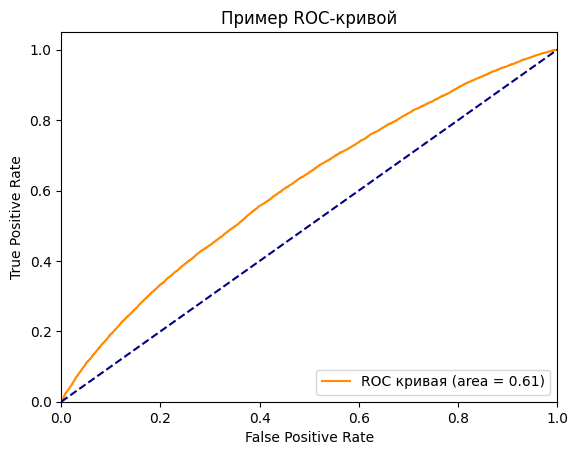

In [49]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

# Predict

In [50]:
df_test = pd.read_csv('test.csv', delimiter='\t')

In [51]:
df_test.head()

,CLIENT_ID,RETRO_DT,tokens,urls_hashed
0,5467000,20200419,vezet 1 hats 2 сухого 1 деньги 1 режим 4 недел...,4104c0437f707b9f443bf845d92d3633 1 83e85bee0d8...
1,6093848,20201107,статью 1 month 4 udobreniya 1 podkormka 1 акту...,db0853001fff2bbe88cb5fa709d8077e 1 6e617b4bfdb...
2,5269916,20200305,zdorovye 2 мобильные 1 снять 2 tovara 1 платье...,1889e0cbd3e343e9521a07aa312257ac 2 aee71c8d18d...
3,816015821,20220115,шины 1 воздушный 1 вкусных 1 эскудо 1 сухого 1...,aee71c8d18d6b91b36bf599208a91777 7 6754d470b22...
4,223498561,20211204,купить 2 blyudo 2 юрист 2 sekretnye 2 funktsii...,1246f8d1136a114c448c1b2565e16698 2 0f7f6a4507e...


In [52]:
df_test = all_convert(df_test)

/var/folders/6q/5hzphrmn0bnfyhk2fyr9bwbc0000gn/T/ipykernel_55081/2402146507.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[words] = df['tokens'].apply(lambda x: parse(x, words)).apply(pd.Series)
/var/folders/6q/5hzphrmn0bnfyhk2fyr9bwbc0000gn/T/ipykernel_55081/2402146507.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[words] = df['tokens'].apply(lambda x: parse(x, words)).apply(pd.Series)
/var/folders/6q/5hzphrmn0bnfyhk2fyr9bwbc0000gn/T/ipykernel_55081/2402146507.py:25: PerformanceWarning: DataFrame is highly fra

In [53]:
f = open('most_expansive_words.txt', 'r')
lines = f.readlines()
f.close()
lines = [line.split()[0] for line in lines]
lines = list(set(lines))

In [93]:
answer = model.predict_proba(Pool(data=df_test[x_columns + lines], embedding_features=x_columns))

In [110]:
answer2 = [x  for [_, x] in answer]

In [111]:
sum(answer2), len(answer2)

(36258.32352595646, 154804)

In [112]:
df = df.reset_index(drop=True)

In [113]:
d = {'CLIENT_ID' : df_test["CLIENT_ID"], 'RETRO_DT': df_test["RETRO_DT"], 'DEF' : answer2}

In [114]:
df = pd.DataFrame(data=d)

In [115]:
df = df.reset_index(drop=True)

In [116]:
df.head()

,CLIENT_ID,RETRO_DT,DEF
0,5467000,20200419,0.158202
1,6093848,20201107,0.174575
2,5269916,20200305,0.103263
3,816015821,20220115,0.146673
4,223498561,20211204,0.226756


In [117]:
df.to_csv('output_float2.csv', sep=',')

# Analyz

## Count def

In [88]:
defs = df['DEF']

In [ ]:
import matplotlib.pyplot as plt
defs = list(defs)
vals = [defs.count(0), defs.count(1)]
labels = ["0", "1"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
plt.show()

## Count unique url_hash

In [91]:
urlhashs = df['urls_hashed']
all = []
for urlhash in urlhashs:
    if(type(urlhash) is float):
        continue
    urlhash = urlhash.split()
    for i in range(0, len(urlhash), 2):
        all.append(urlhash[i])

KeyError: 'URLS_HASHED'

In [92]:
import matplotlib.pyplot as plt
vals = [len(all), len(set(all))]
labels = ["Все url", "Уникальные url"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
plt.show()

TypeError: object of type 'builtin_function_or_method' has no len()

## Слова и уникальные слова

In [ ]:
words = df['tokens']
all = []
for word in words:
    if(type(word) is float):
        continue
    word = word.split()
    for i in range(0, len(word), 2):
        all.append(word[i])

In [ ]:
import numpy as np
fig, ax = plt.subplots( layout='constrained')
categories = ['Все слова', 'Уникальные слова']

ax.bar(categories, np.array([len(all), len(set(all))]))
plt.show()

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
words = df['tokens']

docs = []
for word in words:
    all = []
    if(type(word) is float):
        continue
    word = word.split()
    for i in range(0, len(word), 2):
        all.append(word[i])
    docs.append(' '.join(all))


docs = np.array([docs])
bag = vectorizer.fit_transform(docs)


print(bag.toarray())